In [13]:
# background and observation
import numpy as np

uplimit=60
lowlimit=1
numb=60

obsopt=1
if (obsopt==1):
  dbzy=np.linspace(lowlimit, uplimit, numb)
  deltadbz=0.15*dbzy
  dbzxb=dbzy+deltadbz

if (obsopt==2):
  dbzy=np.linspace(lowlimit, uplimit, numb)
  deltadbz=0.2*dbzy
  dbzxb=dbzy - deltadbz

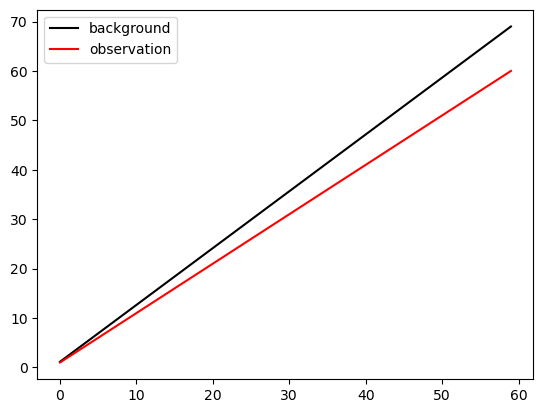

In [33]:
plt.plot(np.arange(0,len(dbzxb)),dbzxb,'black',dbzy,'r')
plt.legend(labels=['background','observation'],loc='best')

In [14]:
xberr=0.5
yerr=0.1

In [18]:
#-----operator---------
rho=1.2
ar=3.63*10**9
pw=1.75
qxb=(10**(dbzxb*0.1)*1/(ar*rho**1.75))**(1/1.75)
hqxb=10*np.log10(ar*(rho*qxb)**1.75)
qy=(10**(dbzy*0.1)*1/(ar*rho**1.75))**(1/1.75)

Text(0, 0.5, 'rain mixing ratio (k kg^-^1)')

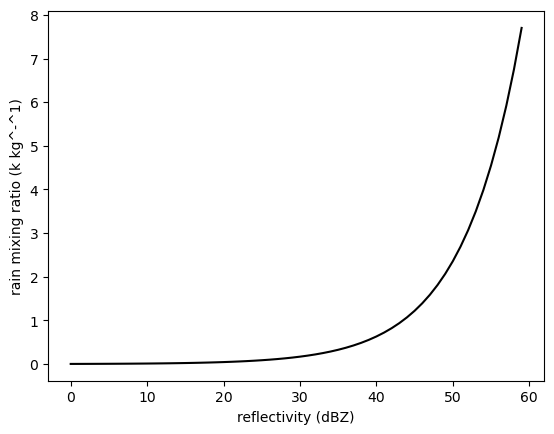

In [23]:
import matplotlib.pyplot as plt
plt.plot(qy*1000,'k-')
plt.xlabel('reflectivity (dBZ)')
plt.ylabel('rain mixing ratio (k kg^-^1)')

In [24]:
ddbz=dbzy-hqxb

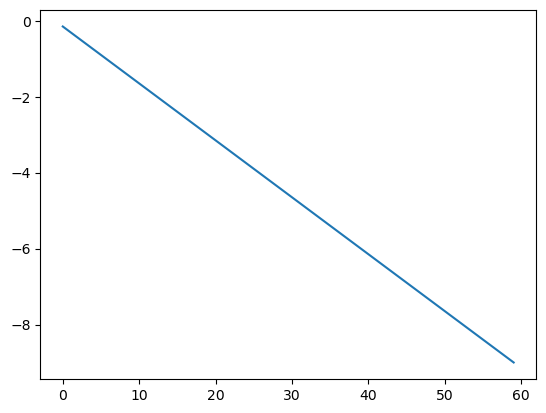

In [25]:

%-------2)CVZ--------------
cvz=zeros(1,numb);
cvzy=zeros(1,numb);

cvzq=zeros(1,numb);

avaricvz=1./HBHT+1./R;
avaricvzy=HBHT+HBHT.*HBHT./R;

 for k=1:itn
     
     gjx=cvzy+(1./R).*(cvz-ddbz);
     gjy=HBHT.*gjx;
     
     if mean(abs(gjx))<eps0 && mean(abs(gjy))<eps0
         break
     end
     
   %  djx=(gjx*gjx')/(gjx*(avaricvz'.*gjx'));
   %  djy=(gjy*gjy')/(gjy*(avaricvzy'.*gjy'));
   
     djx=1./avaricvz;
     djy=1./avaricvzy;
     
     cvz=cvz-gjx.*djx;
     cvzy=cvzy-gjy.*djy;
 end
     
 Hcvz=hqxb+cvz;
 
 for i=1:numb
     cvzq(1,i)=qxb(1,i)+(enqxbp(i,:).*cvz(1,i))/henqxbp(i,:);
 end
 hcvza=10.*log10(ar.*(rho.*cvzq).^1.75);
 %plot(hcvza,'r')
